In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('flightDataset.csv')

## Data Analysis

#### size of the data

In [4]:
df.shape

(417283, 18)

In [5]:
df.sample(5)

,departure_time,arrival_time,airline,flight_number,duration_min,duration_hr,stops,layover_min,cabin_class,price_USD,price_INR,day_of_week,is_weekend,departure_hour,arrival_hour,days_before_departure,source,destination
4855,2025-06-09 13:30:00,2025-06-09 15:05:00,AI,AI-2605,95,1.58,0,0,Economy,38.85,3330.22,Monday,False,13,15,2,BOM,GOI
210848,2025-07-03 21:50:00,2025-07-03 23:00:00,AI,AI-520,70,1.17,0,0,Economy,88.54,7589.65,Thursday,False,21,23,26,HYD,BOM
229882,2025-07-06 06:00:00,2025-07-06 06:45:00,6E,6E-6483,45,0.75,0,0,Economy,79.25,6793.31,Sunday,True,6,6,29,DEL,AMD
78802,2025-06-18 10:45:00,2025-06-18 11:50:00,6E,6E-904,65,1.08,0,0,Economy,54.79,4696.60,Wednesday,False,10,11,11,BLR,MAA
410056,2025-07-27 06:25:00,2025-07-27 07:50:00,AI,AI-2539,85,1.42,0,0,Economy,80.39,6891.03,Sunday,True,6,7,50,BOM,BLR


- We have a unnecessary unnamed column , we can remove that
- Duration is in hours, price is in Rupees
- We have airline,fligth_Code,source,destination,departure,arrival,stops,class,duration,days_left and price as cols/features 
- duration,days_left and price are only numerical columns

In [6]:
df.head()

,departure_time,arrival_time,airline,flight_number,duration_min,duration_hr,stops,layover_min,cabin_class,price_USD,price_INR,day_of_week,is_weekend,departure_hour,arrival_hour,days_before_departure,source,destination
0,2025-06-08 00:05:00,2025-06-08 01:45:00,AI,AI-2613,100,1.67,0,0,Economy,210.84,18073.20,Sunday,True,0,1,1,AMD,DEL
1,2025-06-08 00:05:00,2025-06-08 01:45:00,AI,AI-2613,100,1.67,0,0,Economy,259.43,22238.34,Sunday,True,0,1,1,AMD,DEL
2,2025-06-08 00:05:00,2025-06-08 01:45:00,AI,AI-2613,100,1.67,0,0,Economy,186.81,16013.35,Sunday,True,0,1,1,AMD,BOM
3,2025-06-08 00:05:00,2025-06-08 01:45:00,AI,AI-2613,100,1.67,0,0,Economy,156.45,13410.89,Sunday,True,0,1,1,AMD,BOM
4,2025-06-08 00:05:00,2025-06-08 01:45:00,AI,AI-2613,100,1.67,0,0,Economy,203.98,17485.17,Sunday,True,0,1,1,AMD,HYD


#### datatypes of the features

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417283 entries, 0 to 417282
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   departure_time         417283 non-null  object 
 1   arrival_time           417283 non-null  object 
 2   airline                417283 non-null  object 
 3   flight_number          417283 non-null  object 
 4   duration_min           417283 non-null  int64  
 5   duration_hr            417283 non-null  float64
 6   stops                  417283 non-null  int64  
 7   layover_min            417283 non-null  int64  
 8   cabin_class            417283 non-null  object 
 9   price_USD              417283 non-null  float64
 10  price_INR              417283 non-null  float64
 11  day_of_week            417283 non-null  object 
 12  is_weekend             417283 non-null  bool   
 13  departure_hour         417283 non-null  int64  
 14  arrival_hour           417283 non-nu

- Duration can be rounded of and converted to int to reduce space
- Downcast price and daysleft from int64 - int16
- As our dataset is big and it can get even bigger in the future
- Strings (object type) take a lot of memory.
Converting them to category stores each unique value only once, and internally uses integer codes to represent values.
So for 300,000 rows, if the column has only 6 unique airlines, you'll save a lot of RAM.

In [108]:
df['duration'] = df['duration'].round().astype('int16')  # or 'int32'
df['days_left'] = pd.to_numeric(df['days_left'], downcast='integer')
df['price'] = pd.to_numeric(df['price'], downcast='integer')

categorical_cols = ['airline', 'flight', 'source_city', 'departure_time',
                    'stops', 'arrival_time', 'destination_city', 'class']
for col in categorical_cols:
    df[col] = df[col].astype('category')


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   airline           300153 non-null  category
 1   flight            300153 non-null  category
 2   source_city       300153 non-null  category
 3   departure_time    300153 non-null  category
 4   stops             300153 non-null  category
 5   arrival_time      300153 non-null  category
 6   destination_city  300153 non-null  category
 7   class             300153 non-null  category
 8   duration          300153 non-null  int16   
 9   days_left         300153 non-null  int8    
 10  price             300153 non-null  int32   
dtypes: category(8), int16(1), int32(1), int8(1)
memory usage: 4.6 MB


- converting and downcasting numerical features saved 5 MB => 20% space red
- doing both operation reduced the space from **25MB - 5MB**

#### Checking for missing values

In [8]:
df.isnull().sum()

departure_time           0
arrival_time             0
airline                  0
flight_number            0
duration_min             0
duration_hr              0
stops                    0
layover_min              0
cabin_class              0
price_USD                0
price_INR                0
day_of_week              0
is_weekend               0
departure_hour           0
arrival_hour             0
days_before_departure    0
source                   0
destination              0
dtype: int64

Since there are no missing values in our current dataset, we don't need to handle them during exploratory analysis or initial modeling.
However, when designing the machine learning pipeline, it's important to include missing value handling (e.g., imputation or removal) to ensure the model remains robust when processing new or unseen data that may contain missing values.

#### Checking for duplicated values

In [11]:
df.duplicated().sum()

0

- 3202 duplicated rows observed 
- Should you remove duplicates?
   - Yes, usually you should remove them — here’s why:
   - Redundancy: Duplicate rows don't add any new information.
   - Bias: They can skew statistical analysis, especially averages or model training.
   - Model performance: In machine learning, duplicates can cause overfitting or misleading patterns.

In [10]:
df = df.drop_duplicates()
print(f"After dropping duplicates: {df.shape}")


After dropping duplicates: (328628, 18)


#### data statistics

In [12]:
df.describe()

,duration_min,duration_hr,stops,layover_min,price_USD,price_INR,departure_hour,arrival_hour,days_before_departure
count,328628.000000,328628.000000,328628.0,328628.0,328628.000000,328628.000000,328628.000000,328628.000000,328628.000000
mean,120.180855,2.002979,0.0,0.0,115.772821,9924.046141,12.240110,12.201629,25.728718
std,37.025613,0.617182,0.0,0.0,91.646134,7855.906603,6.383906,6.631945,14.219079
min,0.000000,0.000000,0.0,0.0,23.730000,2034.140000,0.000000,0.000000,1.000000
25%,90.000000,1.500000,0.0,0.0,74.190000,6359.570000,7.000000,7.000000,13.000000
50%,125.000000,2.080000,0.0,0.0,100.230000,8591.720000,12.000000,12.000000,26.000000
75%,145.000000,2.420000,0.0,0.0,136.180000,11673.350000,18.000000,18.000000,38.000000
max,930.000000,15.500000,0.0,0.0,2959.200000,253662.620000,23.000000,23.000000,50.000000


price - Highly skewed: Median is ₹7,425; Max is ₹1.23 lakh
Insight: A few very expensive flights skew the average → we can consider log transformation or outlier handling

In [82]:
numeric_cols = ['duration', 'days_left', 'price']
corr_matrix = df[numeric_cols].corr()
print(corr_matrix)

           duration  days_left     price
duration   1.000000  -0.038726  0.204248
days_left -0.038726   1.000000 -0.091983
price      0.204248  -0.091983  1.000000


- Weak positive correlation between duration and price. Longer flights tend to have higher prices, but duration alone doesn’t fully explain price variation.
- price and days_left Weak negative correlation. Booking earlier (higher days_left) tends to associate with slightly lower prices, but relationship is weak.

In [13]:
sns.countplot(df['airline'])

ValueError: could not convert string to float: 'AI'

- We have a data of total 6 airlines
- This just tells us that vistara airline datas is dominant in the dataset but let's do comparison by no of unique airlines

In [14]:
df3 = df.groupby(['flight','airline'],as_index=False,observed=True).count()
df3['airline'].value_counts()

KeyError: 'flight'

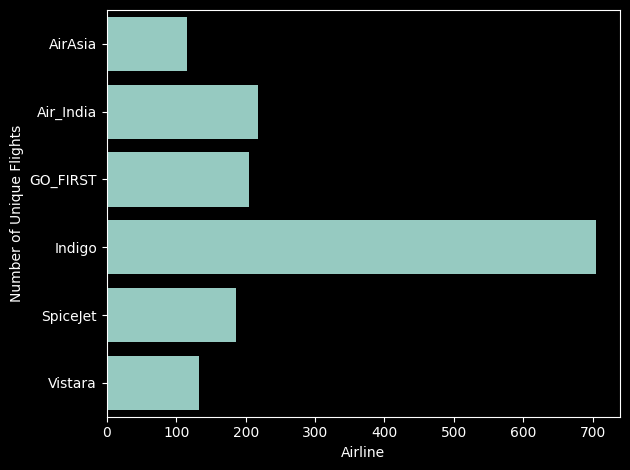

In [85]:
sns.countplot(df3['airline'])
plt.ylabel("Number of Unique Flights")
plt.xlabel("Airline")
plt.tight_layout()
plt.show()

- Indigo has the most number of airlines
- This suggests that Indigo has the largest operational footprint among the airlines in this dataset.

<Axes: xlabel='count', ylabel='stops'>

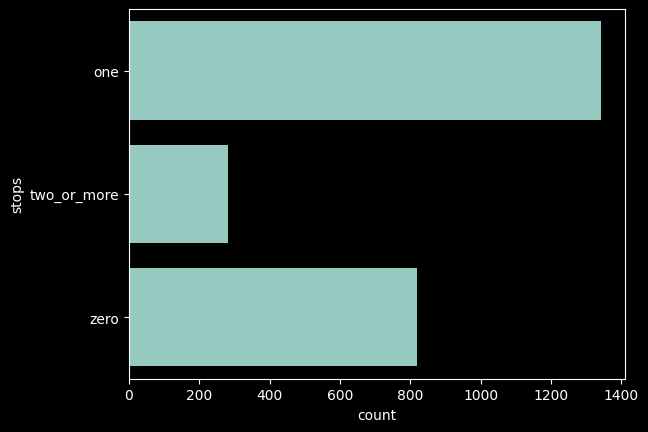

In [86]:
df4 = df.groupby(['airline','flight','stops'],as_index=False,observed=True).count()
sns.countplot(df4['stops'])

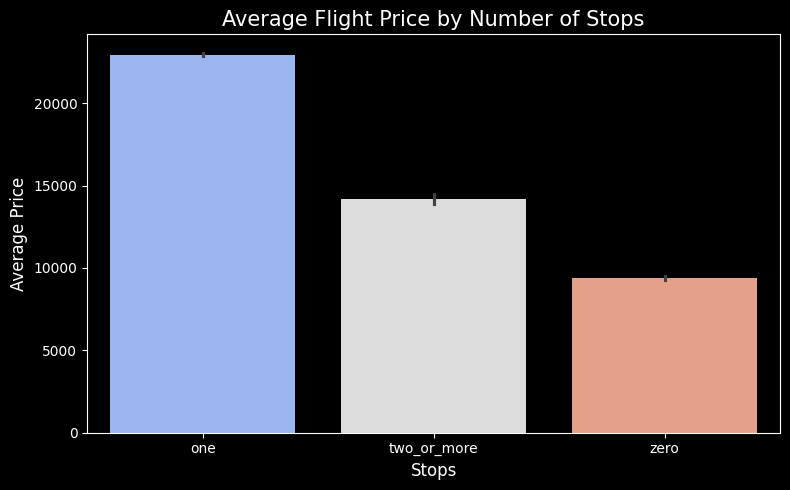

In [87]:
plt.figure(figsize=(8, 5))
sns.barplot(x='stops', y='price', data=df,hue='stops', estimator='mean', palette='coolwarm')
plt.title('Average Flight Price by Number of Stops', fontsize=15)
plt.xlabel('Stops', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.tight_layout()
plt.show()

- More number of flights are of one stops , also they have higher prices compared to others
- zero stops have the minimum price

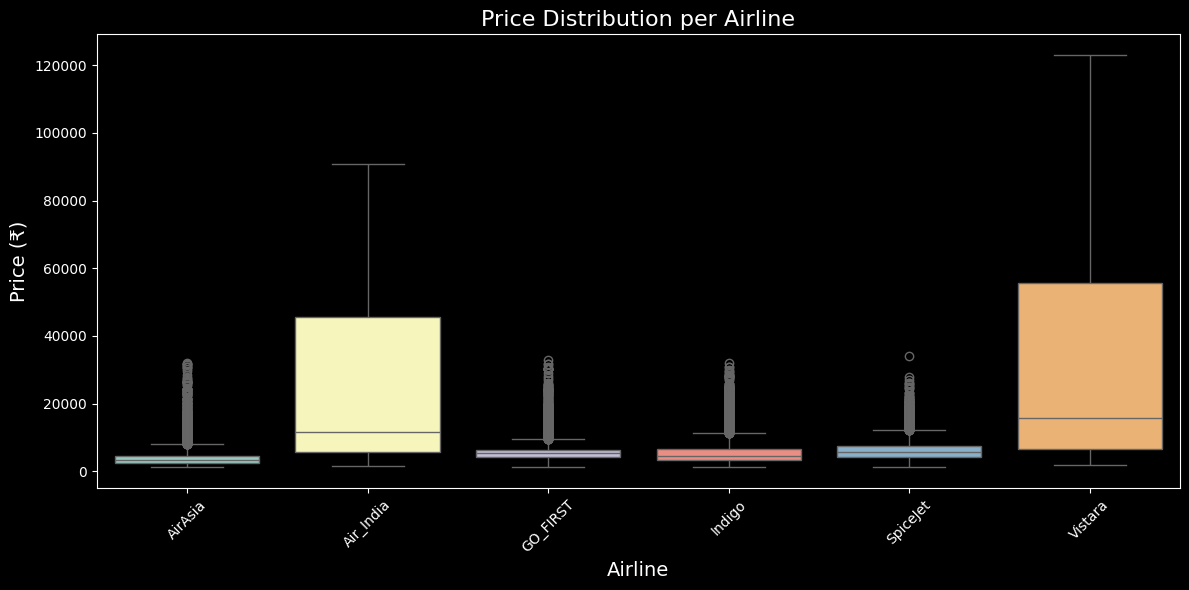

In [88]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='airline', hue='airline',y='price', palette='Set3')
plt.title('Price Distribution per Airline', fontsize=16)
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Price (₹)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Vistara has Maximum Price range
- Vistara and Air_India Airlines Have Maximum Price when compared to Others
- SpiceJet , AirAsia , GO_First and Indigo has some what equal prices

#### Class vs price

In [89]:
df2=df.groupby(['flight','airline','class'],as_index=False,observed=True).count()
df2['class'].value_counts()

class
Economy     1560
Business     295
Name: count, dtype: int64

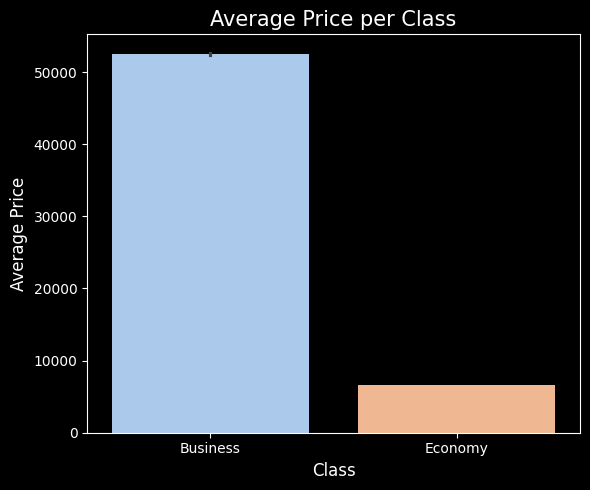

In [90]:
plt.figure(figsize=(6, 5))
sns.barplot(x='class', y='price', data=df, hue='class',estimator='mean', palette='pastel')
plt.title('Average Price per Class', fontsize=15)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.tight_layout()
plt.show()

- Business class has very high mean price as compared to economy class
- Also more people prefer economy class which shows why economy class flights are more dominant 

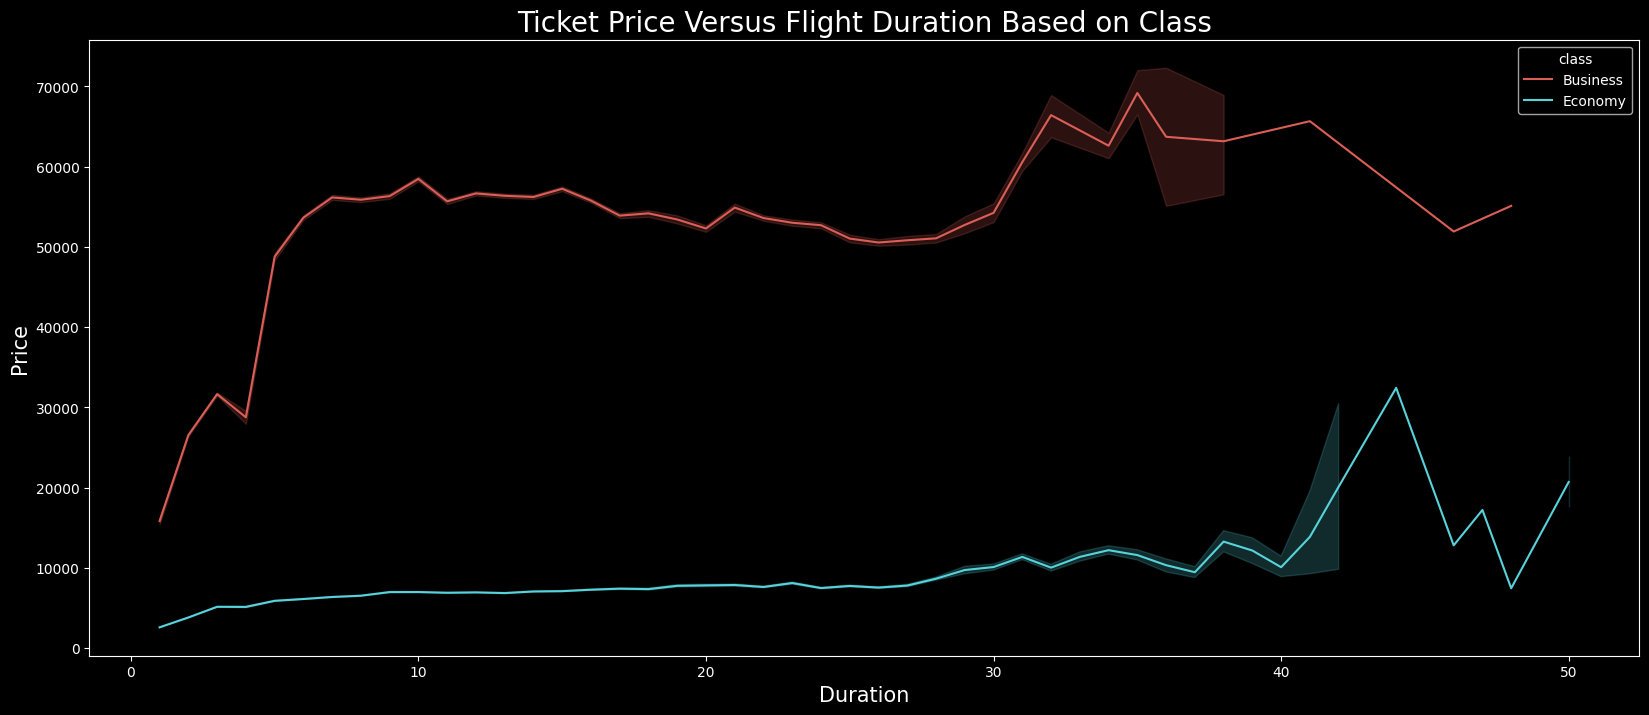

In [91]:
plt.style.use('dark_background')
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='duration',y='price',hue='class',palette='hls')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

C:\Users\PARTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PARTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


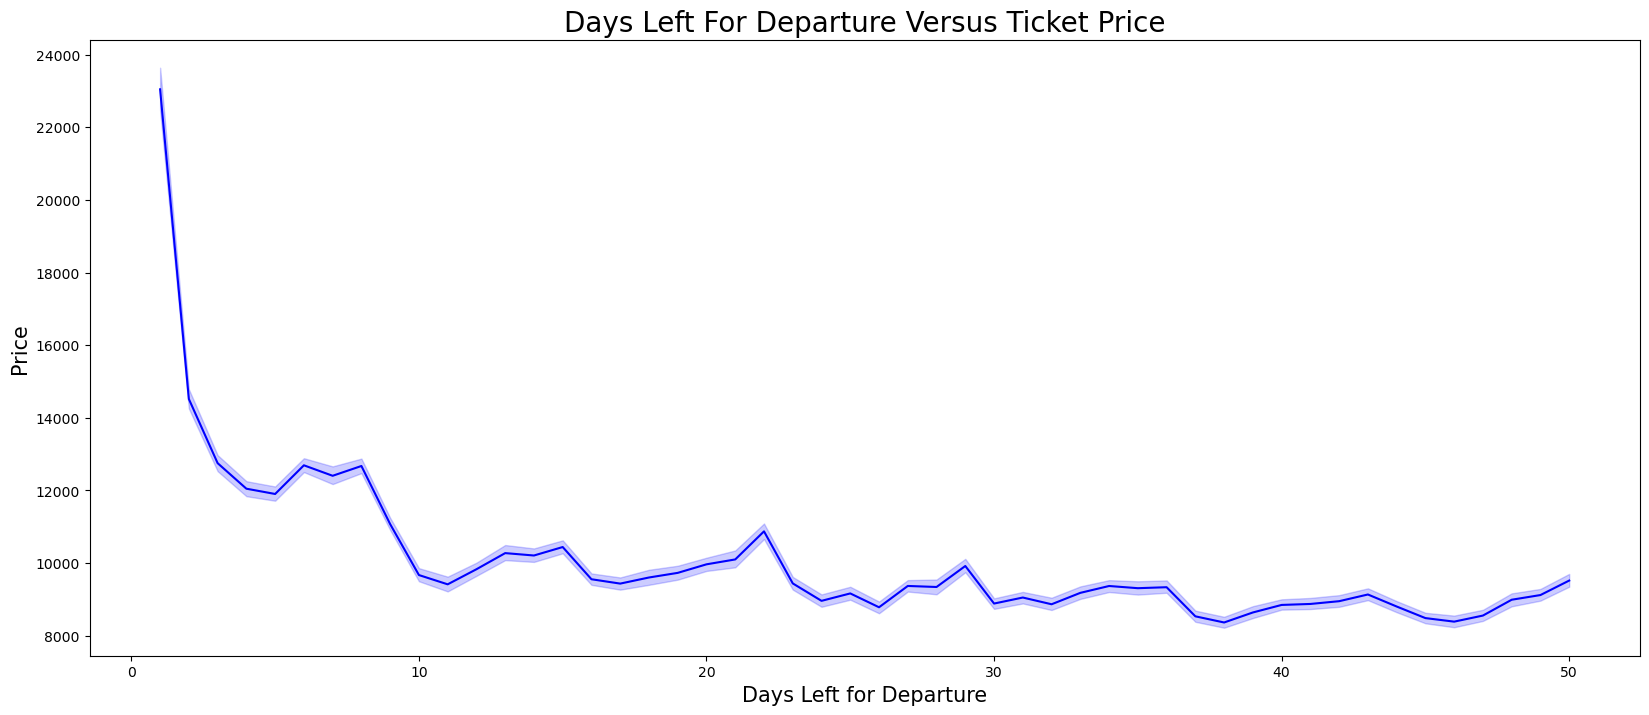

In [36]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_before_departure',y='price_INR',color='blue')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=20)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

C:\Users\PARTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PARTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PARTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\PARTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

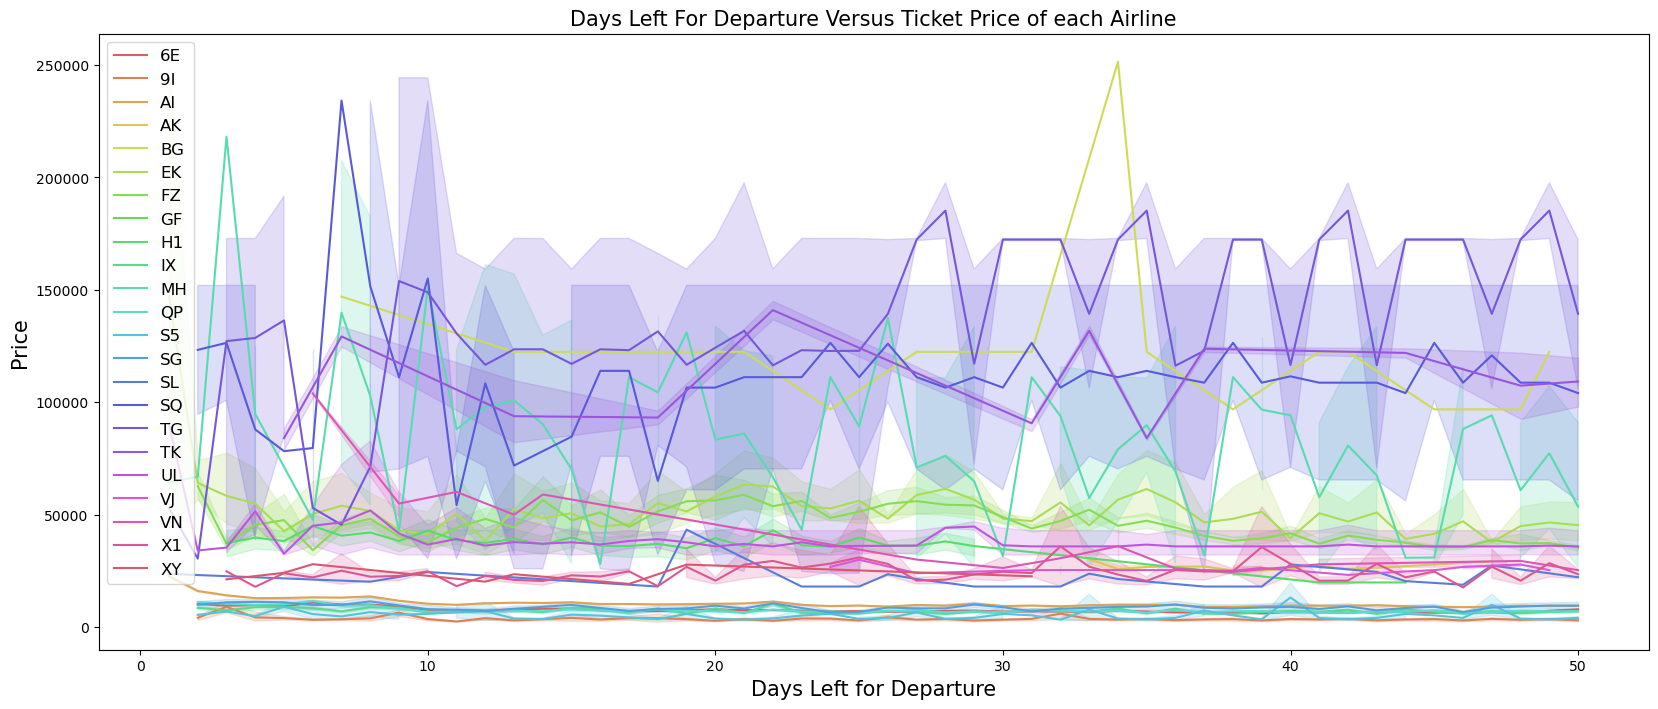

In [37]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_before_departure',y='price_INR',color='blue',hue='airline',palette='hls')
plt.title('Days Left For Departure Versus Ticket Price of each Airline',fontsize=15)
plt.legend(fontsize=12)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Total number of Flights from one city to another

In [94]:
df2 = df.groupby(['flight','source_city','destination_city','airline','class'], observed=True).size().reset_index(name='count')
top_city_pairs = df2.groupby(['source_city', 'destination_city'], observed=True).size().reset_index(name='flight_count')
top_city_pairs = top_city_pairs.sort_values(by='flight_count', ascending=False).head(10)
top_city_pairs

,source_city,destination_city,flight_count
14,Delhi,Mumbai,364
10,Delhi,Bangalore,310
13,Delhi,Kolkata,306
27,Mumbai,Delhi,282
11,Delhi,Chennai,258
29,Mumbai,Kolkata,240
25,Mumbai,Bangalore,228
1,Bangalore,Delhi,227
12,Delhi,Hyderabad,224
22,Kolkata,Delhi,185


In [95]:
df_avg_price = df.groupby(['airline', 'source_city', 'destination_city'], as_index=False, observed=True)['price'].mean()
df_avg_price.head(10)


,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,2073.043478
1,AirAsia,Bangalore,Delhi,4835.218241
2,AirAsia,Bangalore,Hyderabad,2931.494792
3,AirAsia,Bangalore,Kolkata,4443.468160
4,AirAsia,Bangalore,Mumbai,3342.385350
5,AirAsia,Chennai,Bangalore,1914.760870
6,AirAsia,Chennai,Delhi,3707.758916
7,AirAsia,Chennai,Hyderabad,2053.182540
8,AirAsia,Chennai,Kolkata,3682.338762
9,AirAsia,Chennai,Mumbai,2691.100000


### Now that we have done EDA , for this prediction model , Predict minimum observed price historically for similar flights (e.g., same route, airline, class) given days_left.

In [96]:
# group_cols = [
#     'flight',              # Flight number (unique identifier)
#     'source_city',         # Departure city
#     'destination_city',    # Arrival city
#     'class',               # Cabin class (Economy/Business)
#     'stops',               # Number of stops (e.g., 'zero', 'one')
#     # 'departure_time',      # Time of departure (Morning, Evening, etc.)
#     # 'arrival_time'         # Time of arrival
# ]

In [15]:
df.head()

,departure_time,arrival_time,airline,flight_number,duration_min,duration_hr,stops,layover_min,cabin_class,price_USD,price_INR,day_of_week,is_weekend,departure_hour,arrival_hour,days_before_departure,source,destination
0,2025-06-08 00:05:00,2025-06-08 01:45:00,AI,AI-2613,100,1.67,0,0,Economy,210.84,18073.20,Sunday,True,0,1,1,AMD,DEL
1,2025-06-08 00:05:00,2025-06-08 01:45:00,AI,AI-2613,100,1.67,0,0,Economy,259.43,22238.34,Sunday,True,0,1,1,AMD,DEL
2,2025-06-08 00:05:00,2025-06-08 01:45:00,AI,AI-2613,100,1.67,0,0,Economy,186.81,16013.35,Sunday,True,0,1,1,AMD,BOM
3,2025-06-08 00:05:00,2025-06-08 01:45:00,AI,AI-2613,100,1.67,0,0,Economy,156.45,13410.89,Sunday,True,0,1,1,AMD,BOM
4,2025-06-08 00:05:00,2025-06-08 01:45:00,AI,AI-2613,100,1.67,0,0,Economy,203.98,17485.17,Sunday,True,0,1,1,AMD,HYD


In [18]:
group_cols = [
    'flight_number',
    'source',
    'destination',
    'duration_min',
]

# Sort by group columns + days_left ascending (day 1, 2, 3, ...)
df = df.sort_values(by=group_cols + ['days_before_departure'], ascending=[True]*len(group_cols) + [True])

# Compute cumulative minimum price from day 1 up to current day for each group
df['min_price_up_to_day'] = df.groupby(group_cols,observed=True)['price_INR'].cummin()


In [32]:
df.sample()

,departure_time,arrival_time,airline,flight_number,duration_min,duration_hr,stops,layover_min,cabin_class,price_USD,price_INR,day_of_week,is_weekend,departure_hour,arrival_hour,days_before_departure,source,destination,min_price_up_to_day
322948,2025-07-17 02:30:00,2025-07-17 04:45:00,6E,6E-2788,135,2.25,0,0,Economy,59.23,5077.2,Thursday,False,2,4,40,DEL,CCU,4781.46


In [34]:
filtered_df = df[
    (df['airline'] == '6E') &
    (df['flight_number'] == '6E-2788') &
    (df['duration_min'] == 135) &
    (df['source'] == 'DEL') &
    (df['destination'] == 'CCU') 
].sort_values(by='days_before_departure')

print(filtered_df)


             departure_time         arrival_time airline flight_number  \
2826    2025-06-09 02:30:00  2025-06-09 04:45:00      6E       6E-2788   
9017    2025-06-10 02:30:00  2025-06-10 04:45:00      6E       6E-2788   
16472   2025-06-11 02:30:00  2025-06-11 04:45:00      6E       6E-2788   
24684   2025-06-12 02:30:00  2025-06-12 04:45:00      6E       6E-2788   
32689   2025-06-13 02:30:00  2025-06-13 04:45:00      6E       6E-2788   
41407   2025-06-14 02:30:00  2025-06-14 04:45:00      6E       6E-2788   
50135   2025-06-15 02:30:00  2025-06-15 04:45:00      6E       6E-2788   
58453   2025-06-16 02:30:00  2025-06-16 04:45:00      6E       6E-2788   
67487   2025-06-17 02:30:00  2025-06-17 04:45:00      6E       6E-2788   
75954   2025-06-18 02:30:00  2025-06-18 04:45:00      6E       6E-2788   
83940   2025-06-19 02:30:00  2025-06-19 04:45:00      6E       6E-2788   
92500   2025-06-20 02:30:00  2025-06-20 04:45:00      6E       6E-2788   
100682  2025-06-21 02:30:00  2025-06-2

### Now our model have minimum price up to day feature which is actually our target variable accoring to our problem

## Feature transformations

In [125]:
# train test split
from sklearn.model_selection import train_test_split

# Features: drop the target column (and any non-feature columns if needed)
target_col = 'min_price_up_to_day'
X = df.drop(columns=[target_col])
y = df[target_col]

# Train-test split (80% train, 20% test), with shuffle by default
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#### encodin categorical columns

In [126]:
X_train

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
11125,Air_India,AI-506,Delhi,Morning,zero,Afternoon,Bangalore,Economy,3,8,7425
176184,Vistara,UK-890,Hyderabad,Evening,one,Morning,Kolkata,Economy,15,48,5960
263853,Vistara,UK-772,Kolkata,Morning,one,Late_Night,Delhi,Business,14,47,66063
193762,Indigo,6E-727,Chennai,Evening,zero,Night,Mumbai,Economy,2,49,3000
51930,Vistara,UK-875,Mumbai,Evening,one,Afternoon,Delhi,Economy,20,45,5232
...,...,...,...,...,...,...,...,...,...,...,...
145689,Air_India,AI-9720,Kolkata,Early_Morning,two_or_more,Night,Hyderabad,Economy,16,29,7543
174713,Vistara,UK-878,Hyderabad,Afternoon,one,Evening,Kolkata,Economy,28,36,7767
72622,GO_FIRST,G8-331,Mumbai,Morning,one,Night,Hyderabad,Economy,12,18,4262
175529,AirAsia,I5-1518,Hyderabad,Evening,one,Morning,Kolkata,Economy,13,43,4234


In [130]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

# Your transformer from before
preprocessor = ColumnTransformer(transformers=[
    ('ord1', OrdinalEncoder(categories=[['zero', 'one', 'two_or_more']]), ['stops']),
    ('ord2', OrdinalEncoder(categories=[['Economy', 'Business']]), ['class']),
    ('ohe', OneHotEncoder(sparse_output=False, drop='first'), 
           ['airline', 'source_city', 'departure_time', 'arrival_time', 'destination_city'])
], remainder='passthrough')  # numeric columns are left as-is

# Final pipeline with standardization
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('scaler', StandardScaler())  # This scales ALL columns output by preprocessor
])


In [133]:
X_train['flight'].nunique()


1558

In [136]:
from category_encoders import TargetEncoder

encoder = TargetEncoder(cols=['flight'])

# fit only on training data
X_train['flight_encoded'] = encoder.fit_transform(X_train['flight'], y_train)
X_test['flight_encoded'] = encoder.transform(X_test['flight'])
X_train.drop(columns=['flight'], inplace=True)
X_test.drop(columns=['flight'], inplace=True)



In [137]:
X_train_transformed = pipeline.fit_transform(X_train)

In [139]:
X_test_transformed = pipeline.transform(X_test)

In [ ]:
## model training and testing 

In [141]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# List of models to test
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, verbosity=0)
}

# Evaluate each model
results = []

for name, model in models.items():
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # fix here
    r2 = r2_score(y_test, y_pred)

    results.append((name, mae, rmse, r2))

# Print Results
print(f"{'Model':<20} {'MAE':<10} {'RMSE':<10} {'R² Score':<10}")
print("-" * 50)
for name, mae, rmse, r2 in results:
    print(f"{name:<20} {mae:<10.2f} {rmse:<10.2f} {r2:<10.4f}")


Model                MAE        RMSE       R² Score  
--------------------------------------------------
Linear Regression    2028.58    3109.16    0.9785    
Ridge Regression     2028.60    3109.17    0.9785    
Random Forest        123.55     609.24     0.9992    
Gradient Boosting    913.06     1692.18    0.9936    
XGBoost              527.09     1066.87    0.9975    


In [149]:
import pandas as pd

# 1. Create test sample DataFrame
test_sample = pd.DataFrame({
    'flight_encoded': [123],
    'stops': ['one'],
    'class': ['Economy'],
    'airline': ['Indigo'],
    'source_city': ['Delhi'],
    'departure_time': ['Morning'],
    'arrival_time': ['Afternoon'],
    'destination_city': ['Kolkata'],
    'price': [4500],
    'days_left': [30],
    'duration': [120]
})

# 2. Transform the sample
test_sample_transformed = pipeline.transform(test_sample)

# 3. Predict
predicted_min_price = model.predict(test_sample_transformed)
print(f"Predicted minimum future price: {predicted_min_price[0]}")


Predicted minimum future price: 3666.572509765625
